# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [1]:
#install spacy in the current conda environment
!pip install spacy


In [2]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.1 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
#import required libraries
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# import spacy
# language_model = spacy.load("en_core_web_sm")
# import matplotlib.pyplot as plt

# import numpy as np
!pip install matplotlib
!pip show matplotlib
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

Name: matplotlib
Version: 3.9.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later
        
        1. This LICENSE AGREEMENT is between the Matplotlib Development Team
        ("MDT"), and the Individual or Organization ("Licensee") accessing and
        otherwise using matplotlib software in source or binary form and its
        associated documentation.
        
        2. Subject to the terms and conditions of this License Agreement, MDT
        hereby grants Licensee a nonexclusive, royalty-free, world-wide license
        to reproduce, analyze, test, perform and/or display publicly, prepare
        derivative works, distribute, and otherwise use matplotlib
        alone or in any derivative version, provided, however, that MDT's
        License Agreement and MDT's notice of copyright, i.e., "Copyright (c)

### Problem 1 and example: common words in the Michigan subreddit

In [4]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [5]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [6]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [7]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [8]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [9]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [10]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [11]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [12]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

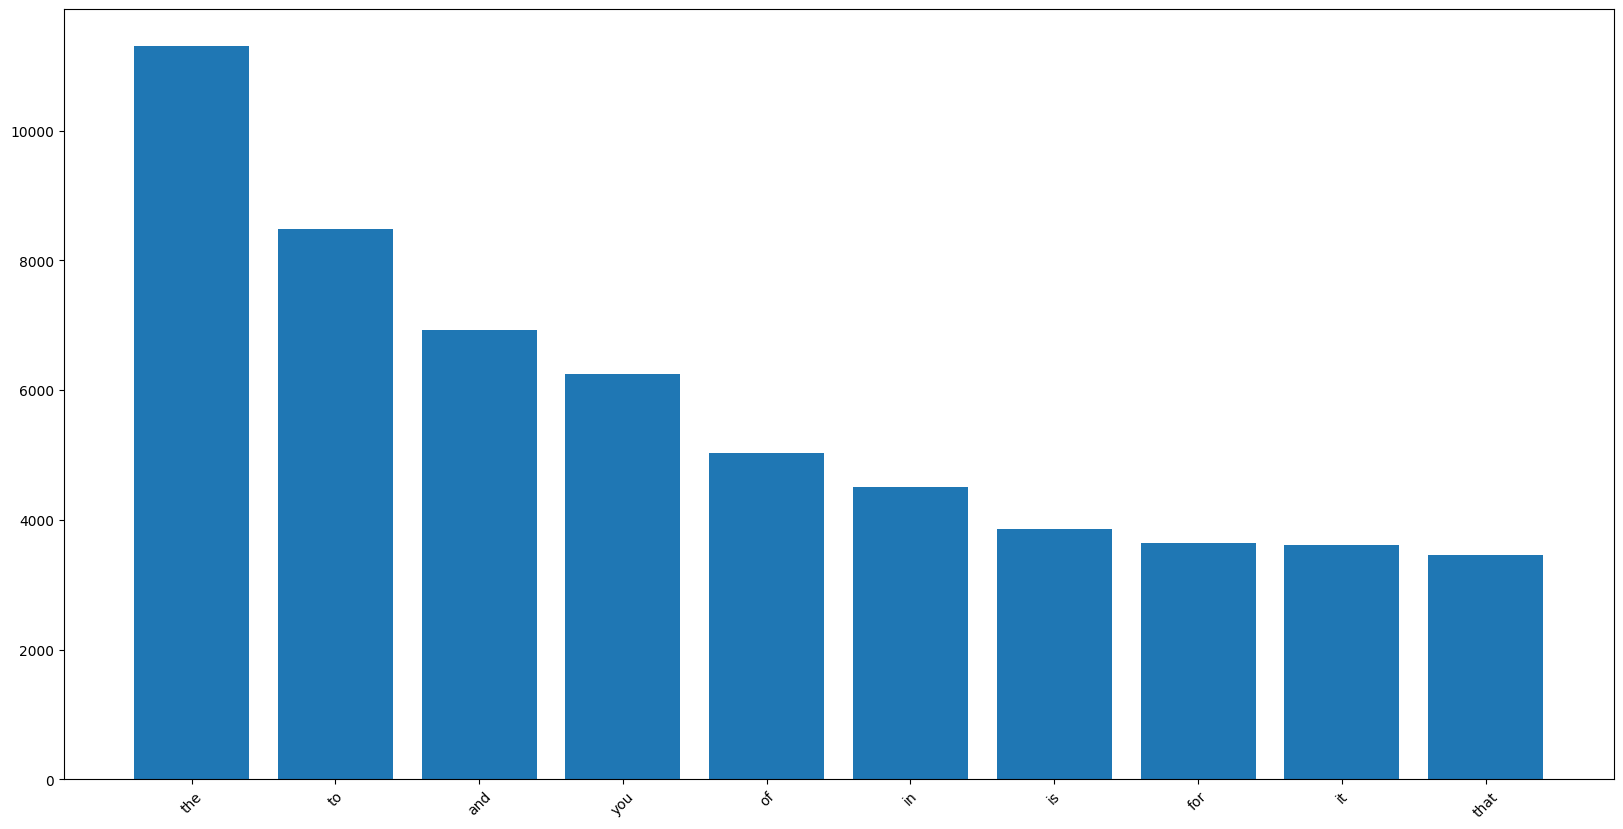

In [14]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: I realize that the words in this plot are not very informative. They are all common words used in everyday language that appear in many contexts. This is not useful for studying the community. 

#### Lemmatization and stopword removal

In [15]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [16]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [17]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [18]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8637 sparse matrix of type '<class 'numpy.int64'>'
	with 126833 stored elements in Compressed Sparse Row format>

In [19]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not               2862
student           1183
like              1183
people            1124
class              988
                  ... 
sell minnesota       3
cred                 3
credential           3
sell oregon          3
pay dollar           3
Length: 8637, dtype: int64

In [20]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

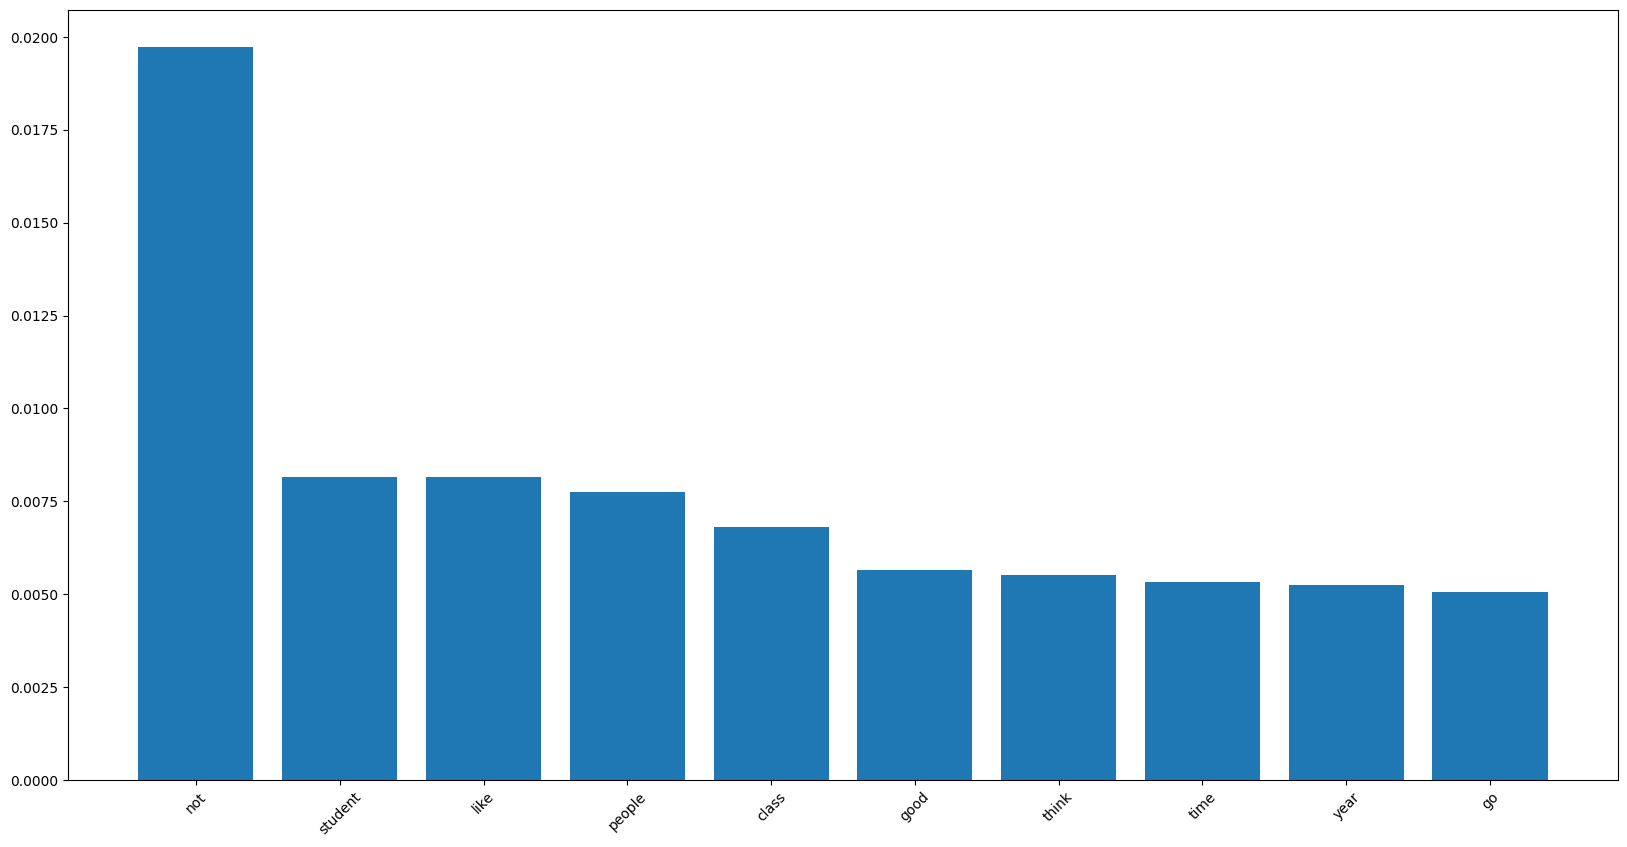

In [21]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [22]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.138501862325838e-05

In [23]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000034
cs                  0.001228
computer            0.000262
dtype: float64

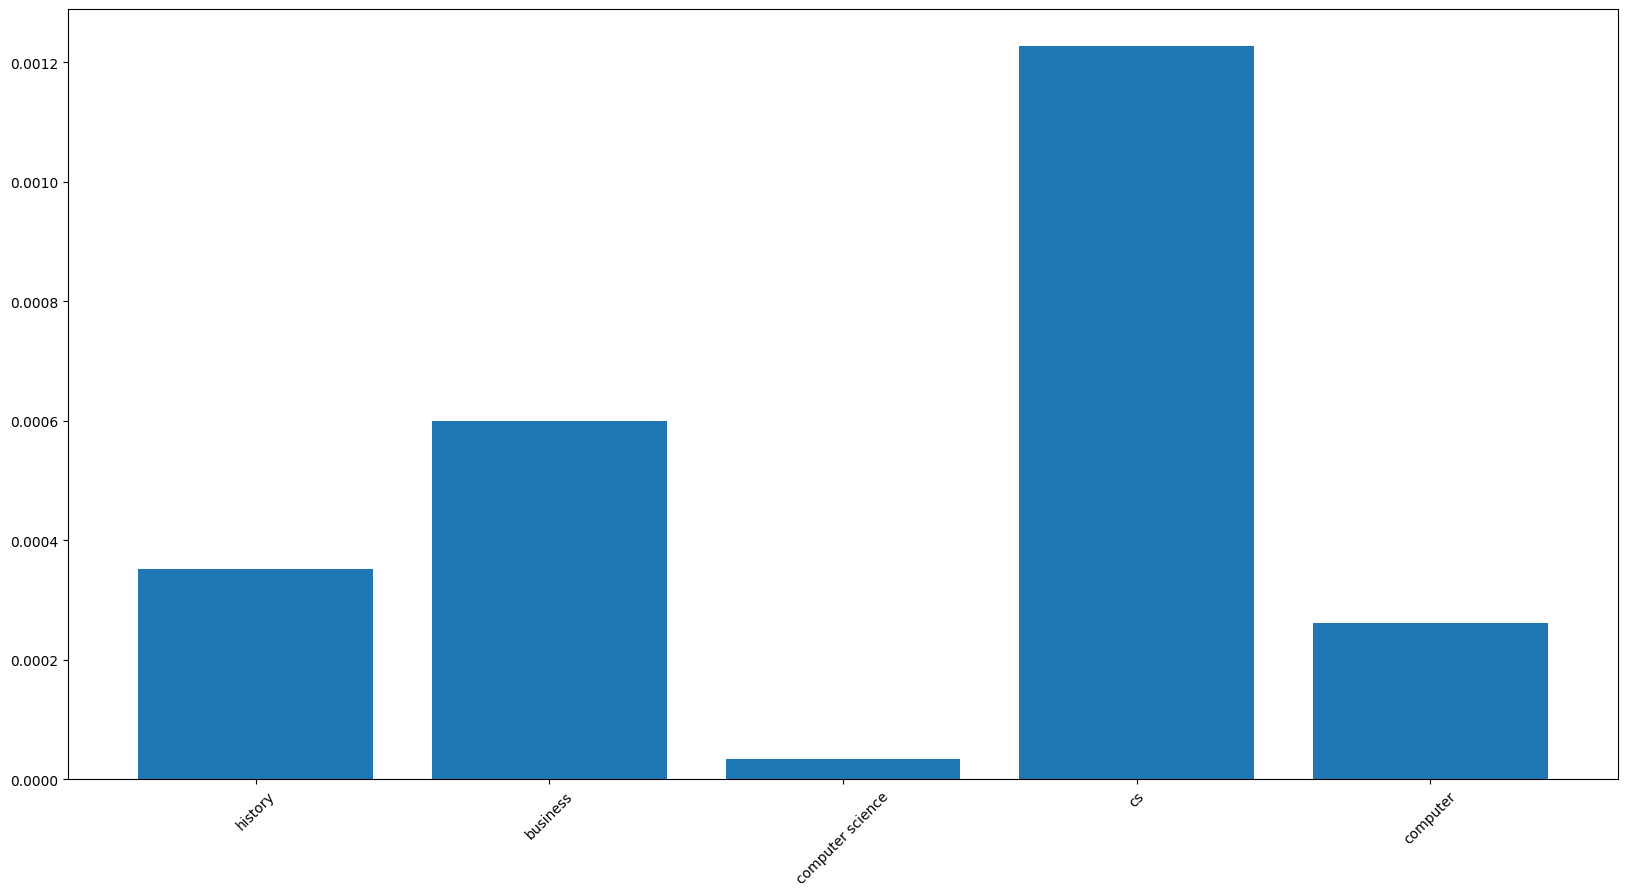

In [24]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [25]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 
plot_list=word_counts[["english", "psychology", "science", "library", "math"]]
plot_list

english       0.000103
psychology    0.000062
science       0.000483
library       0.000352
math          0.002262
dtype: float64

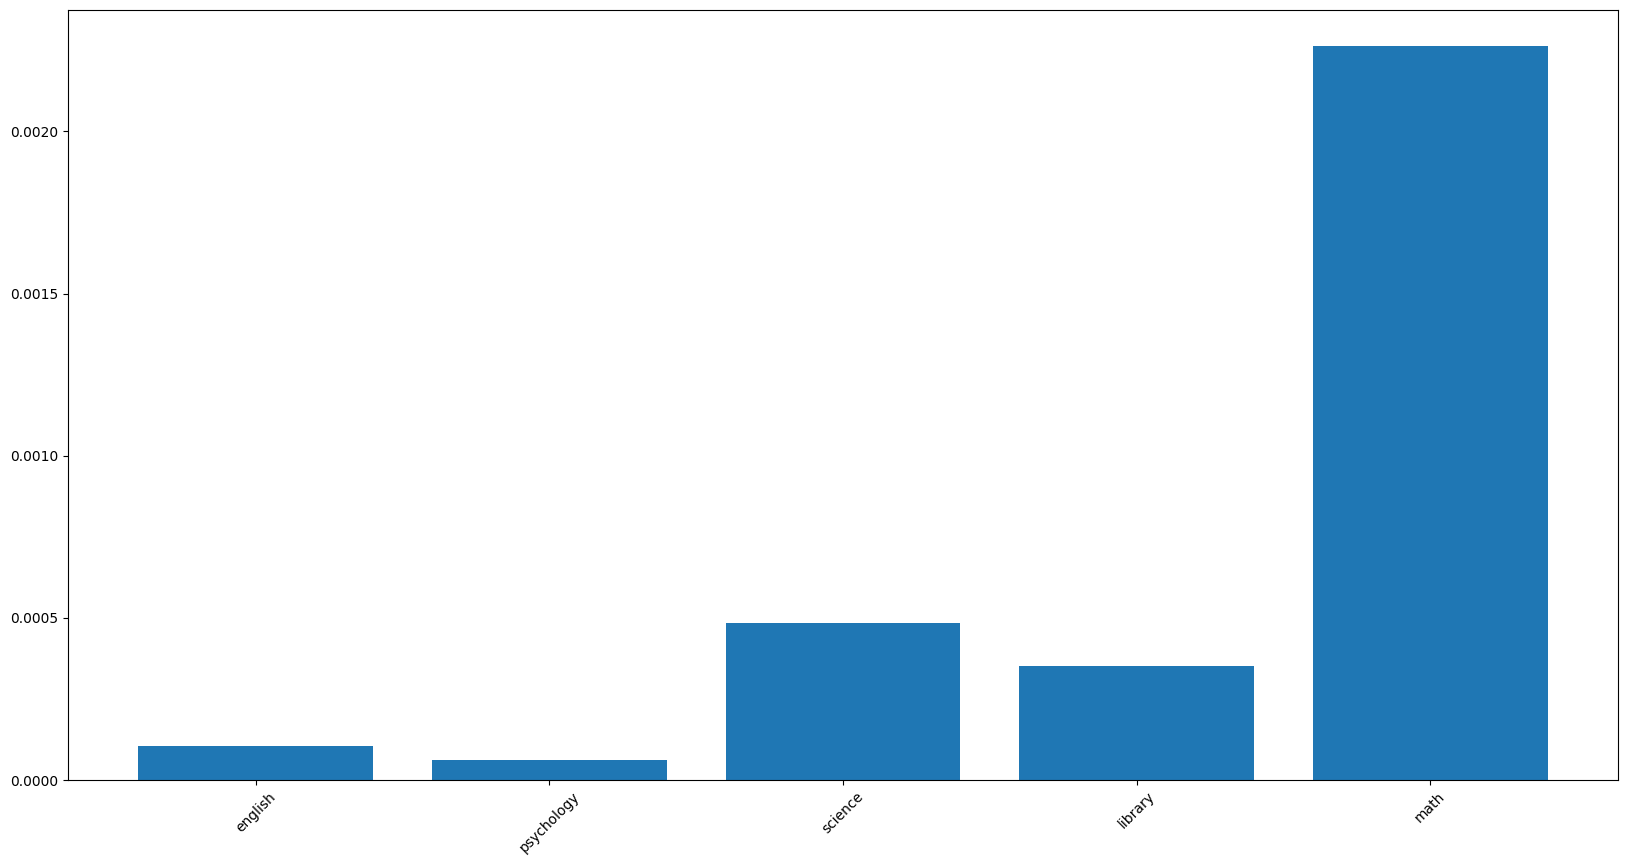

In [26]:
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [27]:
uiuc=pd.read_csv("uiuc.csv")
uiuc


,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1
...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite ...,student176895,4
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If...",OCCLUIUC,5
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup empl...",perpetuallytired29,3


### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [28]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [36]:
#clean and lemmatize the data csv
data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)
data


,Unnamed: 0,date,post_votes,text,user,com_votes,label,cleaned_text,lemmatized_text
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1,have the same professor and in lecture he did ...,professor lecture go to learn stuff ourself re...
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1,do you find it helpful to still go to the lect...,find helpful lecture slide embed mistake make ...
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1,have you tried emailing university housing to ...,try email university housing request access
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1,purchasing illini cash should get you added to...,purchase illini cash add nonresident meal plan...
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1,just did thanks for the suggestion it hadnt oc...,thank suggestion not occur
...,...,...,...,...,...,...,...,...,...
498,498,2024-09-02 01:28:43,31,And literally the homework is referring to cal...,LemonPepperMints,1,0,and literally the homework is referring to cal...,literally homework refer calculus discrete mat...
1555,1555,2024-08-28 06:25:01,143,Wait til you see thundersnow. Now that's exc...,CharlieLeDoof,25,0,wait til you see thundersnow now thats exciting,wait til thundersnow s exciting
5372,5372,2024-07-30 20:53:58,233,Invest in a good shotgun for next time,tovarischstalin,-28,0,invest in a good shotgun for next time,invest good shotgun time
4086,4086,2024-08-13 13:48:08,9,I like the NCRB (north campus recreation build...,arijwei,5,0,i like the ncrb north campus recreation buildi...,like ncrb north campus recreation build equipm...


In [37]:
#create a bag of words representation with count vectorizer
data_vectorizer = CountVectorizer(min_df = 3, max_df = 0.3, ngram_range = (1,2))
data_bag_of_words = data_vectorizer.fit_transform(data['lemmatized_text'])
data_bag_of_words

<9450x8419 sparse matrix of type '<class 'numpy.int64'>'
	with 124094 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [40]:
#train a logistic regression model using the bag of words features as X and the label column as y
logistic_model = LogisticRegression()
logistic_model.fit(data_bag_of_words, data['label'])

LogisticRegression()

In [41]:
#report the accuracy of the model
logistic_model.score(data_bag_of_words, data['label'])

0.8990476190476191

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [ ]:
# what is the accuracy of the model? Is it better or worse than previous? Why do you think it has changed? 

The accuracy is much more specific and better than the previously ambigious model. I believe the model changed because it is more tailored towards 

#### Part 3: Examine the top features of your model using the following code

In [88]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?

#I noticed that the words were very expected. I saw familiar language used on campus, such as rsos and grainger. Regarding the top most negative coefficient, I notice that I was more unfamiliar and surprised by these words. I am unaware of what mcard and fresno mean.

In [42]:
model_df = pd.DataFrame(data_bag_of_words.toarray(), columns = data_vectorizer.get_feature_names_out())

In [44]:
coefficients = pd.DataFrame({'feature': model_df.columns, 'coefficient': logistic_model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)


In [45]:
top_10_negative

,feature,coefficient
4169,lsa,-1.854587
7297,texas,-1.881011
1959,eec,-1.914121
7825,uofm,-1.929005
7726,um,-1.967274
4325,mcard,-2.045149
1704,diag,-2.065564
2536,fresno,-2.081314
7731,umich,-2.566382
4407,michigan,-3.208292


In [46]:
top_10_positive

,feature,coefficient
7719,uiuc,2.685234
3359,illinois,2.211769
2918,grainger,2.131524
7839,urbana,2.068920
6236,rsos,2.025393
3356,illini,1.980105
1542,danville,1.905825
29,ac,1.678358
937,champaign,1.670335
524,basketball,1.585197


In [93]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

#Yes, UIUC is known for the School of Engineering. It makes sense to see grainger and basketball up there given that we are a D1 university. 

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [53]:
!pwd

/Users/ethanbull/Documents/GitHub/project1-counting-words


In [56]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

In [57]:
corpus = Sparse2Corpus(data_bag_of_words, documents_columns=False)

id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [59]:
#train the lda model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=20)

#show the topics
lda_model.print_topics()

[(0,
  '0.127*"know that" + 0.064*"student myself" + 0.016*"dunlap" + 0.014*"it and" + 0.012*"is it" + 0.010*"send out" + 0.009*"class at" + 0.009*"also it" + 0.009*"access" + 0.008*"there"'),
 (1,
  '0.033*"next to" + 0.026*"love the" + 0.016*"catch" + 0.015*"its an" + 0.014*"far" + 0.013*"talk with" + 0.012*"sunshine" + 0.011*"for what" + 0.010*"kams" + 0.009*"inside"'),
 (2,
  '0.025*"first time" + 0.023*"assigned" + 0.016*"is their" + 0.014*"love the" + 0.014*"get good" + 0.011*"this school" + 0.010*"cry" + 0.010*"please contact" + 0.010*"least thats" + 0.009*"problem"'),
 (3,
  '0.046*"quite literally" + 0.023*"inside" + 0.021*"felt the" + 0.021*"since was" + 0.021*"friends from" + 0.017*"next to" + 0.011*"this school" + 0.011*"first day" + 0.011*"gotten" + 0.010*"friend of"'),
 (4,
  '0.025*"journey" + 0.022*"for it" + 0.016*"college of" + 0.015*"serving" + 0.015*"thats happening" + 0.014*"love the" + 0.013*"husband" + 0.012*"that happens" + 0.010*"there are" + 0.010*"it right"')

In [79]:
#evaluate topic distribution of a review from the bag of words
#print long string without having to scroll
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=data["text"][18]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

Basically you just need to get to ORD (and fly to Newark from there). You’ve got
three options for that  First, you can take a bus. Peoria Charter is a good
option because they have service to ORD from three stops in CU every two hours
or so (and more on busy travel days like school breaks). It’ll take around 3.5-4
hours to get to ORD and tickets around $40-$50 each way  You could also take the
train, but it’s a bit more complicated, as Amtrak’s routes from Champaign to
Chicago will end up you at Union Station in downtown. From there you’ll need to
take the CTA blue line to the airport. It’s around a 2.5-3 hour train ride plus
about 45 minutes on the CTA line. Amtrak tickets are much cheaper though, as
they only cost around $15 if you book in advance (plus another $5 for the CTA
ticket to the airport). You also have more limited timing options, as there are
only 3 trains per day from Champaign to Chicago  Lastly, you could fly. There
are two flights a day from Champaign to ORD, on Amer

In [66]:
data

,Unnamed: 0,date,post_votes,text,user,com_votes,label,cleaned_text,lemmatized_text
0,0,2024-09-04 14:43:40,2,"Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself \n\nI would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture",zhen3441,2,1,have the same professor and in lecture he did say we were gonna have to learn some of the stuff ourself i would recommend using online resources such as pauls online math notes and professor leonard on youtube personally ive been learning the material from those sources before going to lecture,professor lecture go to learn stuff ourself recommend online resource pauls online math note professor leonard youtube personally ve learn material source go lecture
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lecture? It seems to me that his slides are embedded with mistakes here and there. It makes it more confusing for me to understand him.,Kai2747,1,1,do you find it helpful to still go to the lecture it seems to me that his slides are embedded with mistakes here and there it makes it more confusing for me to understand him,find helpful lecture slide embed mistake make confusing understand
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to request access?,TurboBKTastic,2,1,have you tried emailing university housing to request access,try email university housing request access
3,3,2024-09-04 12:52:08,3,"Purchasing Illini Cash should get you added to the Non-Resident Meal Plan card access level. These **generally** allow you access to whatever is considered the ""front door"" of the residence hall with access to the dining hall.\n\nAt PAR, that would be the doors facing the bus stop on the south side of the building. Only the mag stripe reader will work, prox access in (most) of the residence halls is currently only activated for residents with ADA needs.",HoosierCAB,2,1,purchasing illini cash should get you added to the nonresident meal plan card access level these generally allow you access to whatever is considered the front door of the residence hall with access to the dining hall at par that would be the doors facing the bus stop on the south side of the building only the mag stripe reader will work prox access in most of the residence halls is currently only activated for residents with ada needs,purchase illini cash add nonresident meal plan card access level generally allow access consider door residence hall access dining hall par door face bus stop south building mag stripe reader work prox access residence hall currently activate resident ada need
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't occurred to me to do that.",Sector-Both,1,1,just did thanks for the suggestion it hadnt occurred to me to do that,thank suggestion not occur
...,...,...,...,...,...,...,...,...,...
498,498,2024-09-02 01:28:43,31,"And literally the homework is referring to calculus and discrete math stuff but we only learned about the potential method so far in class?? I even went to both the extra classes on Tuesday and Thursday and discussion but neither of them helped me actually answer anything. I wish they’d atleast offer a refresh on what we’re trying to do because I don’t know the point of the homework compared to our lecture, and every question has like 3-4 parts.",LemonPepperMints,1,0,and literally the homework is referring to calculus and discrete math stuff but we only learned about the potential method so far in class i even went to both the extra classes on tuesday and thursday and discussion but neither of them helped me actually answer anything i wish theyd atleast offer a refresh on what were trying to do because i dont know the point of the homework compared to our lecture and every question has like parts,literally homework refer calculus discret

In [69]:
#check the topic distribution of a single review
lda_model.get_document_topics(corpus[18])

[(5, 0.29913136),
 (11, 0.0311345),
 (12, 0.01796734),
 (14, 0.18418525),
 (17, 0.45952708)]

In [70]:
models=lda_model.get_document_topics(corpus, minimum_probability=0)

In [71]:
rows=[]
for i in range(len(models)):
    row=[]
    for m in models[i]:
        row.append(m[1])
    rows.append(row)

topic_df=pd.DataFrame(rows)

In [82]:
topic_df.sort_values(8, ascending=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
60,0.001516,0.001516,0.001516,0.001516,0.001516,0.001516,0.001516,0.001516,0.971204,0.001516,0.001516,0.001516,0.001516,0.001516,0.001516,0.001516,0.001516,0.001516,0.001516,0.001516
906,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613,0.969344,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613,0.001613
74,0.001854,0.001854,0.001854,0.001854,0.001854,0.001854,0.001854,0.001854,0.964782,0.001854,0.001854,0.001854,0.001854,0.001854,0.001854,0.001854,0.001854,0.001854,0.001854,0.001854
68,0.002084,0.002084,0.002084,0.002084,0.002084,0.002084,0.002084,0.002084,0.960397,0.002084,0.002084,0.002084,0.002084,0.002084,0.002084,0.002084,0.002084,0.002084,0.002084,0.002084
544,0.002098,0.002098,0.002098,0.002098,0.002098,0.002098,0.002098,0.002098,0.960142,0.002098,0.002098,0.002098,0.002098,0.002098,0.002098,0.002098,0.002098,0.002098,0.002098,0.002098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,0.000440,0.000440,0.007964,0.147850,0.000440,0.000440,0.000440,0.000440,0.000440,0.000440,0.000440,0.000440,0.000440,0.097082,0.000440,0.710760,0.000440,0.000440,0.029737,0.000440
157,0.000434,0.000434,0.011220,0.000434,0.007308,0.000434,0.908582,0.011548,0.000434,0.000434,0.000434,0.000434,0.000434,0.000434,0.012345,0.000434,0.000434,0.000434,0.042918,0.000434
9206,0.000417,0.045800,0.000417,0.071323,0.000417,0.036295,0.335598,0.032588,0.000417,0.000417,0.000417,0.011112,0.183278,0.031856,0.213371,0.000417,0.034607,0.000417,0.000417,0.000417
243,0.008827,0.009645,0.000312,0.021377,0.000312,0.088856,0.251423,0.000312,0.000312,0.000312,0.000312,0.009475,0.000312,0.000312,0.020384,0.000312,0.299642,0.079961,0.057052,0.150552


In [91]:
topic_df.sort_values(18, ascending=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1888,0.002956,0.002956,0.002956,0.002956,0.002956,0.002956,0.002956,0.002956,0.002956,0.002956,0.002956,0.002956,0.002956,0.002956,0.002956,0.002956,0.002956,0.002956,0.943832,0.002956
883,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.920824,0.004167
32,0.004546,0.004546,0.004546,0.004546,0.004546,0.004546,0.004546,0.004546,0.004546,0.004546,0.004546,0.004546,0.004546,0.004546,0.004546,0.004546,0.004546,0.004546,0.913629,0.004546
838,0.001390,0.001390,0.001390,0.001390,0.001390,0.001390,0.001390,0.001390,0.001390,0.001390,0.001390,0.001390,0.069528,0.001390,0.001390,0.001390,0.001390,0.001390,0.905457,0.001390
1478,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.894422,0.005557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8103,0.014948,0.088787,0.033013,0.000311,0.031262,0.000311,0.070910,0.069858,0.178885,0.032553,0.027352,0.020971,0.029717,0.016196,0.083292,0.000311,0.115471,0.026409,0.000311,0.159133
1366,0.000284,0.000284,0.000284,0.019152,0.000284,0.000284,0.050217,0.000284,0.000284,0.041946,0.000284,0.000284,0.049737,0.040494,0.034936,0.000284,0.742903,0.000284,0.000284,0.017204
899,0.000278,0.051828,0.007195,0.000278,0.034872,0.000278,0.030645,0.000278,0.098210,0.000278,0.009881,0.000278,0.106140,0.000278,0.000278,0.000278,0.657890,0.000278,0.000278,0.000278
8052,0.000266,0.097235,0.102355,0.085757,0.000266,0.023368,0.143821,0.030130,0.249934,0.000266,0.000266,0.000266,0.000266,0.047398,0.000266,0.030992,0.170883,0.015733,0.000266,0.000266


In [83]:
topic_df.sort_values(3, ascending=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1852,0.001668,0.001668,0.001668,0.968307,0.001668,0.001668,0.001668,0.001668,0.001668,0.001668,0.001668,0.001668,0.001668,0.001668,0.001668,0.001668,0.001668,0.001668,0.001668,0.001668
1685,0.001860,0.001860,0.001860,0.964651,0.001860,0.001860,0.001860,0.001860,0.001860,0.001860,0.001860,0.001860,0.001860,0.001860,0.001860,0.001860,0.001860,0.001860,0.001860,0.001860
1715,0.001137,0.001137,0.001137,0.954195,0.001137,0.001137,0.001137,0.001137,0.001137,0.001137,0.001137,0.001137,0.001137,0.025338,0.001137,0.001137,0.001137,0.001137,0.001137,0.001137
2979,0.002504,0.002504,0.002504,0.952431,0.002504,0.002504,0.002504,0.002504,0.002504,0.002504,0.002504,0.002504,0.002504,0.002504,0.002504,0.002504,0.002504,0.002504,0.002504,0.002504
1949,0.000944,0.000944,0.000944,0.925051,0.000944,0.000944,0.000944,0.000944,0.043258,0.000944,0.000944,0.000944,0.000944,0.000944,0.000944,0.000944,0.000944,0.000944,0.015642,0.000944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0.014452,0.021171,0.000373,0.000373,0.010127,0.026096,0.644941,0.000373,0.093389,0.000373,0.000373,0.000373,0.009917,0.000373,0.000373,0.000373,0.000373,0.020566,0.155235,0.000373
8500,0.011171,0.013501,0.071824,0.000360,0.034566,0.000360,0.215157,0.000360,0.026570,0.000360,0.000360,0.028236,0.149029,0.051651,0.036984,0.112037,0.070883,0.032576,0.000360,0.143655
8103,0.014948,0.088787,0.033013,0.000311,0.031262,0.000311,0.070910,0.069858,0.178885,0.032553,0.027352,0.020971,0.029717,0.016196,0.083292,0.000311,0.115471,0.026409,0.000311,0.159133
899,0.000278,0.051828,0.007195,0.000278,0.034872,0.000278,0.030645,0.000278,0.098210,0.000278,0.009881,0.000278,0.106140,0.000278,0.000278,0.000278,0.657890,0.000278,0.000278,0.000278


In [90]:
data["text"][8]

8                                                                                                                                                                                                                                       On the bright side, no shadow ban
8    Yeah. Most upper level math classes require Math 217 as a prereq. If you have any plans on taking 300+ level Math class. Sticking with 217 is probably better. Unless you specifically check that any higher level math class you will be taking doesn't require 217
Name: text, dtype: object

In [84]:
data["text"][18]

'Basically you just need to get to ORD (and fly to Newark from there). You’ve got three options for that\n\nFirst, you can take a bus. Peoria Charter is a good option because they have service to ORD from three stops in CU every two hours or so (and more on busy travel days like school breaks). It’ll take around 3.5-4 hours to get to ORD and tickets around $40-$50 each way\n\nYou could also take the train, but it’s a bit more complicated, as Amtrak’s routes from Champaign to Chicago will end up you at Union Station in downtown. From there you’ll need to take the CTA blue line to the airport. It’s around a 2.5-3 hour train ride plus about 45 minutes on the CTA line. Amtrak tickets are much cheaper though, as they only cost around $15 if you book in advance (plus another $5 for the CTA ticket to the airport). You also have more limited timing options, as there are only 3 trains per day from Champaign to Chicago\n\nLastly, you could fly. There are two flights a day from Champaign to ORD, 

In [85]:
data["text"][3]

'Purchasing Illini Cash should get you added to the Non-Resident Meal Plan card access level. These **generally** allow you access to whatever is considered the "front door" of the residence hall with access to the dining hall.\n\nAt PAR, that would be the doors facing the bus stop on the south side of the building. Only the mag stripe reader will work, prox access in (most) of the residence halls is currently only activated for residents with ADA needs.'

In [92]:
#Based on the sampled topics, I can infer that the words in topic 18 refer to travelling recommendations. The parsed words in the topic 8 suggest taking higher level math courses. However, looking at the percentages that connect the words together in the actual data, it is more difficult to piece together what is being discussed. In topic 3, it is clear that the instructions of meal plans and dining halls in accordance to that.